## Libraries

In [24]:
#basic
import pandas as pd
import seaborn as sns
#plot
import matplotlib.pyplot as plt
import seaborn as sns
#tranform
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Import data

In [8]:
df = pd.read_csv('data/application_train.csv')
pd.set_option("display.max_rows", 122)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
df.isnull().sum() / len(df)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('-----------------------------')

100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
-----------------------------
0    282686
1     24825
Name: TARGET, dtype: int64
-----------------------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
-----------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-----------------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
-----------------------------
135000.0    35750
112500.0    31019
157500.0    26

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
-----------------------------
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
-----------------------------
0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
-----------------------------
0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
-----------------------------
0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
-----------------------------
0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64
-----------------------------
0    236644
1     70867
Nam

0.0000    89498
0.0806    11629
0.1611     9675
0.2417     6379
0.1208     5734
0.0403     4876
0.2014     3962
0.3222     2887
0.2820     2135
0.4028     1554
0.3625     1308
0.4834     1094
0.4431      628
0.5639      491
0.6445      447
0.5236      253
0.6042      226
0.7250      219
1.0000      144
0.8056      137
0.6848       99
0.9667       87
0.8862       66
0.7653       38
0.8459       34
0.9264       20
Name: ELEVATORS_MODE, dtype: int64
-----------------------------
0.1379    36041
0.0690    26704
0.1034    20533
0.2069    19678
0.0345    19428
0.1724     8986
0.2759     8036
0.2414     4013
0.3448     2046
0.3103     2014
0.4138     1212
0.3793      977
0.4828      500
0.4483      431
0.0000      387
0.5517      351
0.5172      301
0.6207      241
0.5862      186
1.0000      152
0.6897      116
0.6552       65
0.8966       52
0.7586       48
0.7241       44
0.8276       42
0.7931       39
0.9655       25
0.9310       21
0.8621       14
Name: ENTRANCES_MODE, dtype: int64
----

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64
-----------------------------
block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64
-----------------------------
0.0000    582
0.0570    247
0.0547    230
0.0550    227
0.0555    227
         ... 
0.3445      1
0.2894      1
0.8712      1
0.5775      1
0.7970      1
Name: TOTALAREA_MODE, Length: 5116, dtype: int64
-----------------------------
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64
-----------------------------
No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64
-----------------------------
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        

## Etude Target

In [12]:
df['TARGET'].value_counts() # Notre target qui va servir pour le modèle est pour le moment déséquilibrée.

0    282686
1     24825
Name: TARGET, dtype: int64

In [13]:
df['TARGET'].unique #ID client unique

<bound method Series.unique of 0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64>

In [14]:
## gérer les valeurs null
df.dropna(inplace=True)

In [15]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## Creat df with categorials and integers columns

In [18]:
categorials = list(df.select_dtypes('object').columns)
categorials

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [19]:
numericals = list(df.select_dtypes(exclude=['object']).columns)
numericals

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [39]:
#change categorial columns
categorials = df[['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']]

for i in categorials.columns:
    categorials[i]= LabelEncoder().fit_transform(df[i])
    categorials[i].unique()
    
categorials

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
71,0,0,1,0,1,6,2,4,1,8,5
124,0,0,0,0,1,1,2,4,1,8,41
152,0,0,0,0,0,6,0,1,1,10,49
161,0,0,1,0,0,6,0,1,1,8,11
255,1,0,1,0,0,6,0,4,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...
307358,0,0,0,0,1,6,0,4,1,16,11
307359,0,0,0,0,1,1,2,4,1,16,39
307407,1,0,0,0,1,5,0,1,1,14,41
307456,0,0,0,0,1,6,2,4,1,1,4


In [31]:
integer = df[['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY']]

In [32]:
integer

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY
71,100083,0,0,573628.5,24435.0
124,100145,0,1,260725.5,16789.5
152,100179,0,0,675000.0,53329.5
161,100190,0,0,263686.5,24781.5
255,100295,1,1,1019205.0,31032.0
...,...,...,...,...,...
307358,456083,0,2,361462.5,16051.5
307359,456084,0,1,675000.0,21906.0
307407,456140,1,1,711454.5,47673.0
307456,456195,0,0,270000.0,15075.0


In [33]:
# 1 = client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
# 0 = all other cases)
integer["TARGET"].value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

## Visualisation

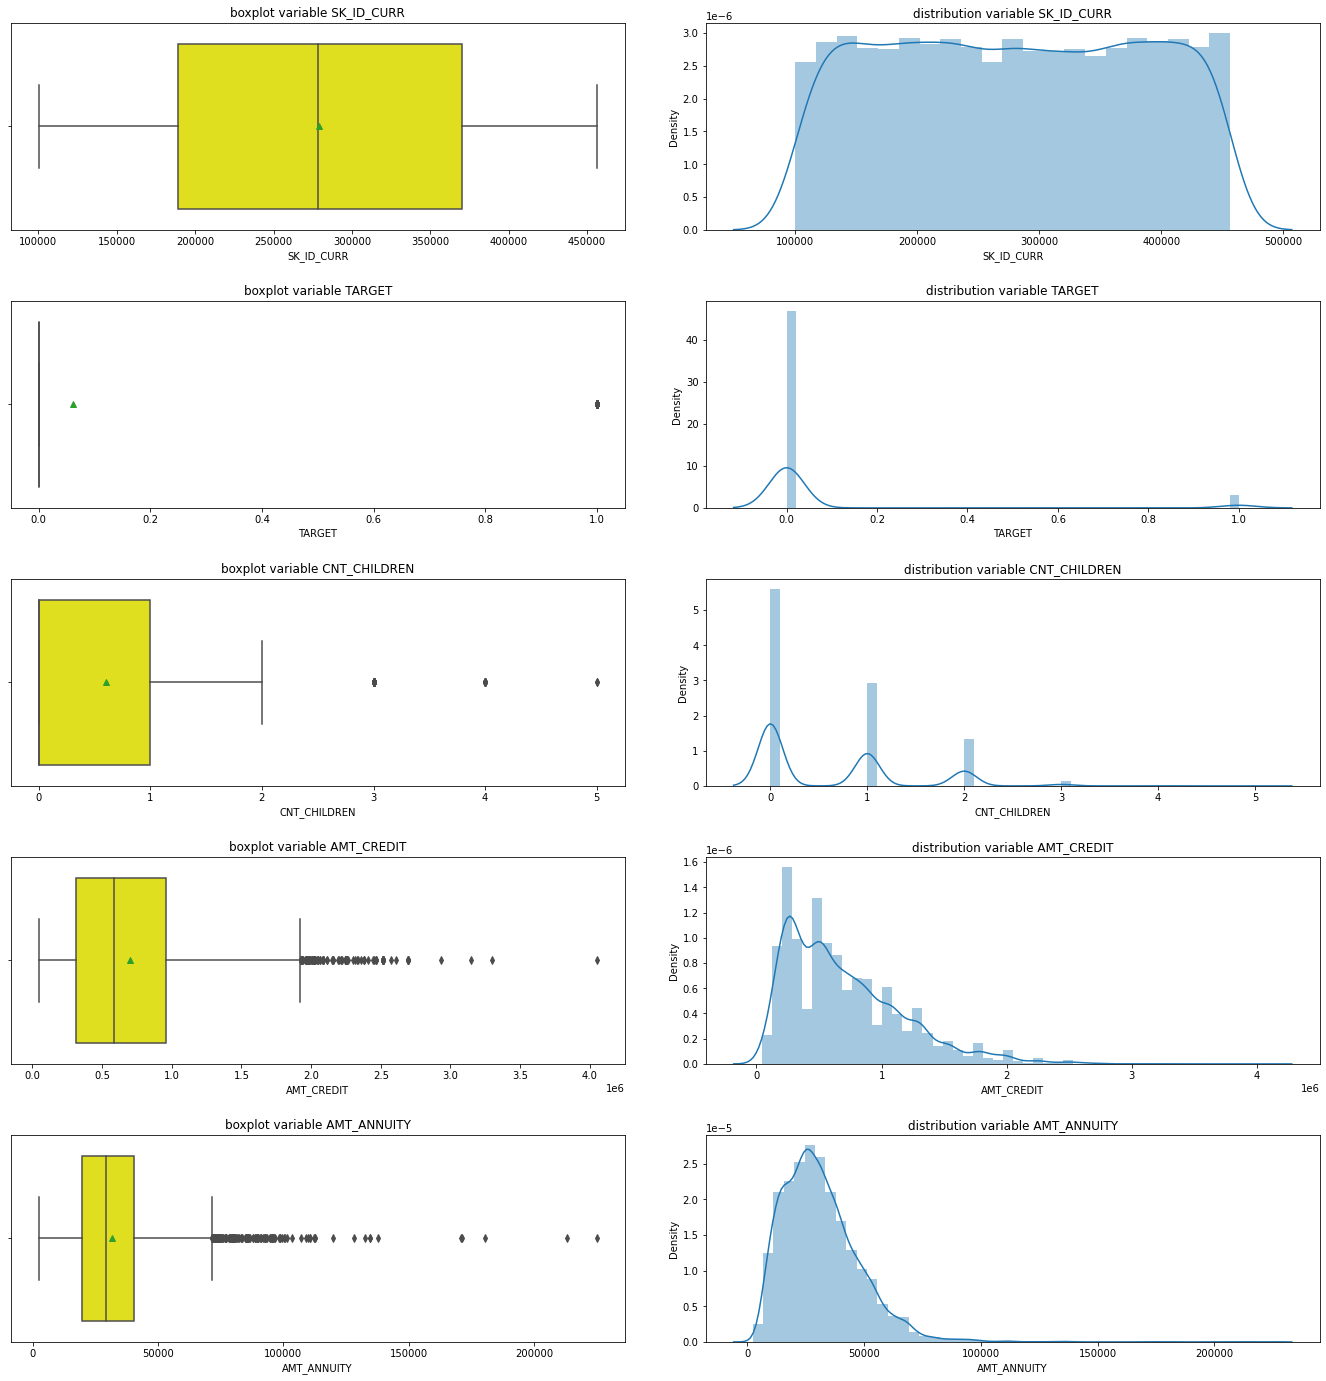

In [34]:
#on définie notre subplot
fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(20,20))
#Variable pour parcourir notre subplot(position)
n=0
#Espace entre les plots
fig.tight_layout(pad=5.0)

#On initie la boucle avec notre list de colonnes 
for i in integer.columns:
    #On affiche les boxplot de chaque variable sur l'axe de gauche
    #On fixe le titre
    axes[n,0].set_title(f'boxplot variable {i}')
    #On plot notre box
    sns.boxplot(i,data=integer,ax=axes[n,0],color="Yellow",showmeans=True)
    #On fixe notre titre
    axes[n,1].set_title(f'distribution variable {i}')
    #On plot notre distribution
    sns.distplot(integer[i],ax=axes[n,1])
    #On incrémente notre seconde variable
    n=n+1

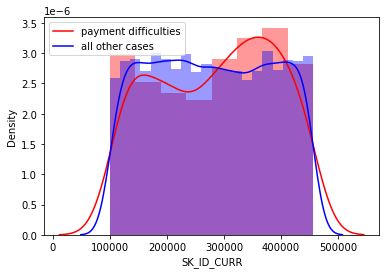

------------------------------------------------------------


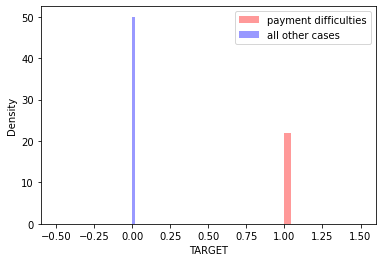

------------------------------------------------------------


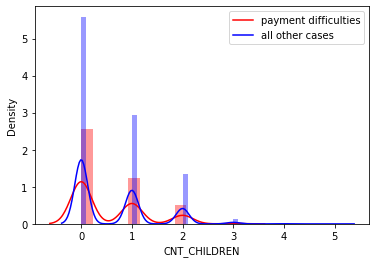

------------------------------------------------------------


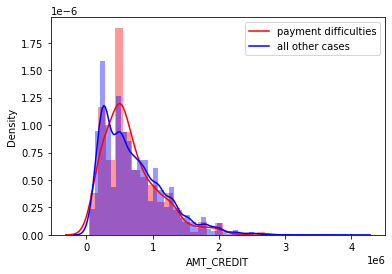

------------------------------------------------------------


In [35]:
for i in integer.iloc[:,:-1].columns:
    sns.distplot(integer[integer.TARGET == 1][i],color="Red")
    sns.distplot(integer[integer.TARGET == 0][i],color="Blue")
    plt.legend(['payment difficulties',"all other cases"])
    plt.show()
    print('------------------------------------------------------------')

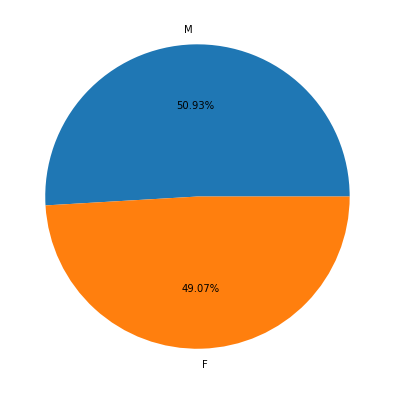

In [37]:
plt.figure(figsize=(10,7))

labels= 'M','F'
plt.pie(categorials['CODE_GENDER'].value_counts().unique(),labels=labels,autopct='%0.02f%%')
plt.show()

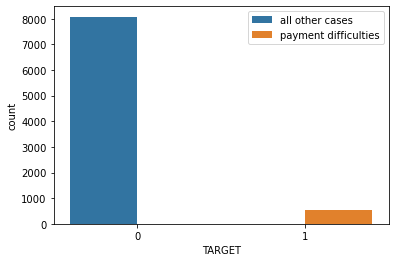

---------------------------------------------------------------------


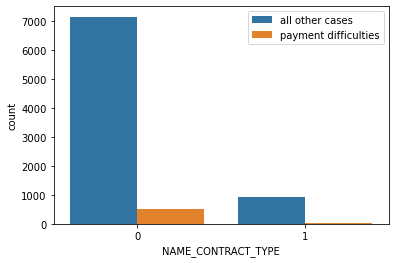

---------------------------------------------------------------------


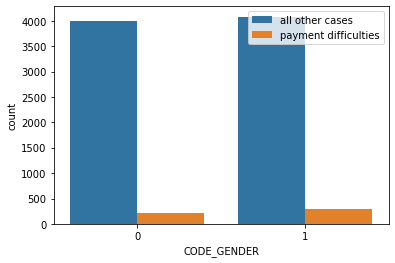

---------------------------------------------------------------------


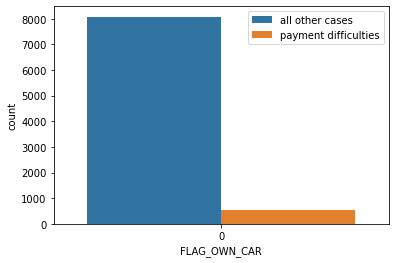

---------------------------------------------------------------------


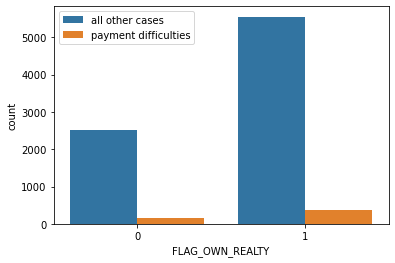

---------------------------------------------------------------------


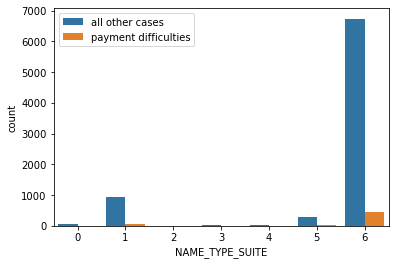

---------------------------------------------------------------------


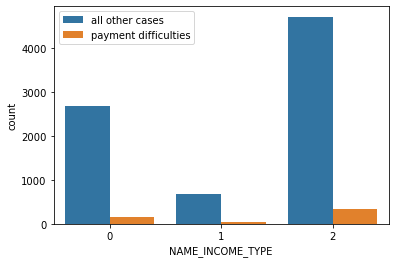

---------------------------------------------------------------------


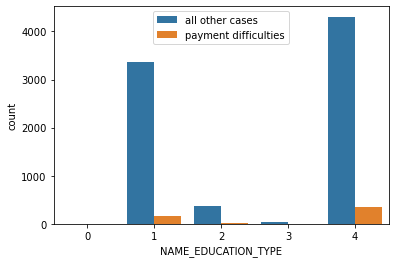

---------------------------------------------------------------------


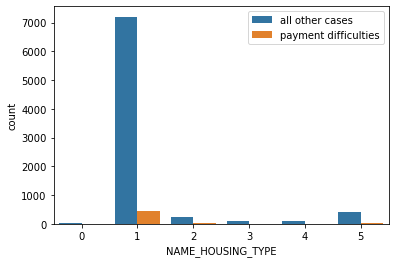

---------------------------------------------------------------------


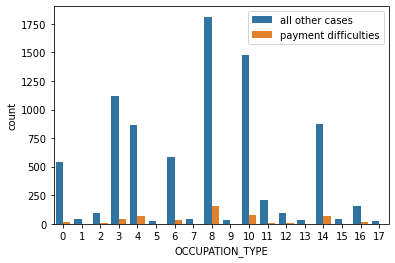

---------------------------------------------------------------------


In [42]:
for i in categorials.iloc[:,:-1].columns:
    sns.countplot(i,hue="TARGET",data= categorials)
    plt.legend(['all other cases','payment difficulties'])
    plt.show()
    print('---------------------------------------------------------------------')

In [44]:
df_heatmap = df[['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'CNT_CHILDREN',
 'AMT_CREDIT',
 'AMT_ANNUITY']]

In [45]:
df_heatmap

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY
71,100083,0,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,Business Entity Type 3,0,573628.5,24435.0
124,100145,0,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,House / apartment,Laborers,Self-employed,1,260725.5,16789.5
152,100179,0,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,House / apartment,Managers,Trade: type 7,0,675000.0,53329.5
161,100190,0,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,House / apartment,Laborers,Government,0,263686.5,24781.5
255,100295,1,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,House / apartment,Laborers,Business Entity Type 3,1,1019205.0,31032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,House / apartment,Security staff,Government,2,361462.5,16051.5
307359,456084,0,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,House / apartment,Security staff,Security,1,675000.0,21906.0
307407,456140,1,Cash loans,F,Y,Y,"Spouse, partner",Commercial associate,Higher education,House / apartment,Sales staff,Self-employed,1,711454.5,47673.0
307456,456195,0,Cash loans,F,Y,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Cleaning staff,Business Entity Type 2,0,270000.0,15075.0


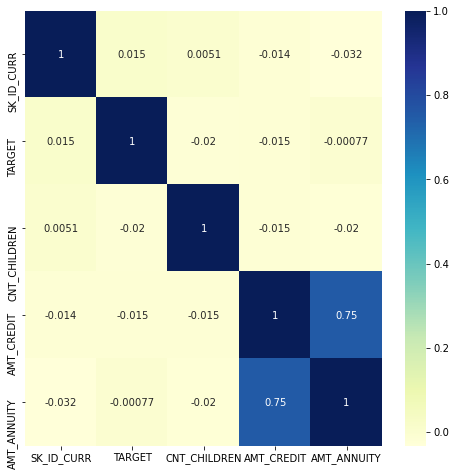

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_heatmap.corr(), cmap= "YlGnBu", annot=True)
plt.show()